# Classification Models Comparisons

in this notebook we will use different kinds of Image classification models and compare them on the given categories. 
The first one will be looking at is accuracy and Loss because they're our prioties during this training and also the time it takes to predict the image. 

1. Setup
2. Data preparation (data spliting and labeling)
3. Data cleaning and Exploration
4. Building Model
    - ImageNet
    - VGG-16
    - High Resolution CNN
    - CoAtNet-7
    - ViT-G/14
5. Ensemble Approaches
6. Comparisons
7. Results

## 1. Setup
This Python 3 environment comes with many helpful analytics libraries installed  
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python  
For example, here's several helpful packages to load.   
In this stage we will use this data set https://paperswithcode.com/dataset/tiny-imagenet. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings  
warnings.filterwarnings('ignore')

%matplotlib inline 
import tensorflow as tf 

import cv2 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from tqdm import tqdm
import random 
import pickle 

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split  
import os 

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os, glob
from torchvision.io import read_image, ImageReadMode

# 2. Data Preparation
Picking the right dataset for our models is one of the key components for solving the best image classification we will use in our app.


100%|██████████| 500/500 [00:02<00:00, 244.45it/s]


# 3. Data cleaning and Exploration

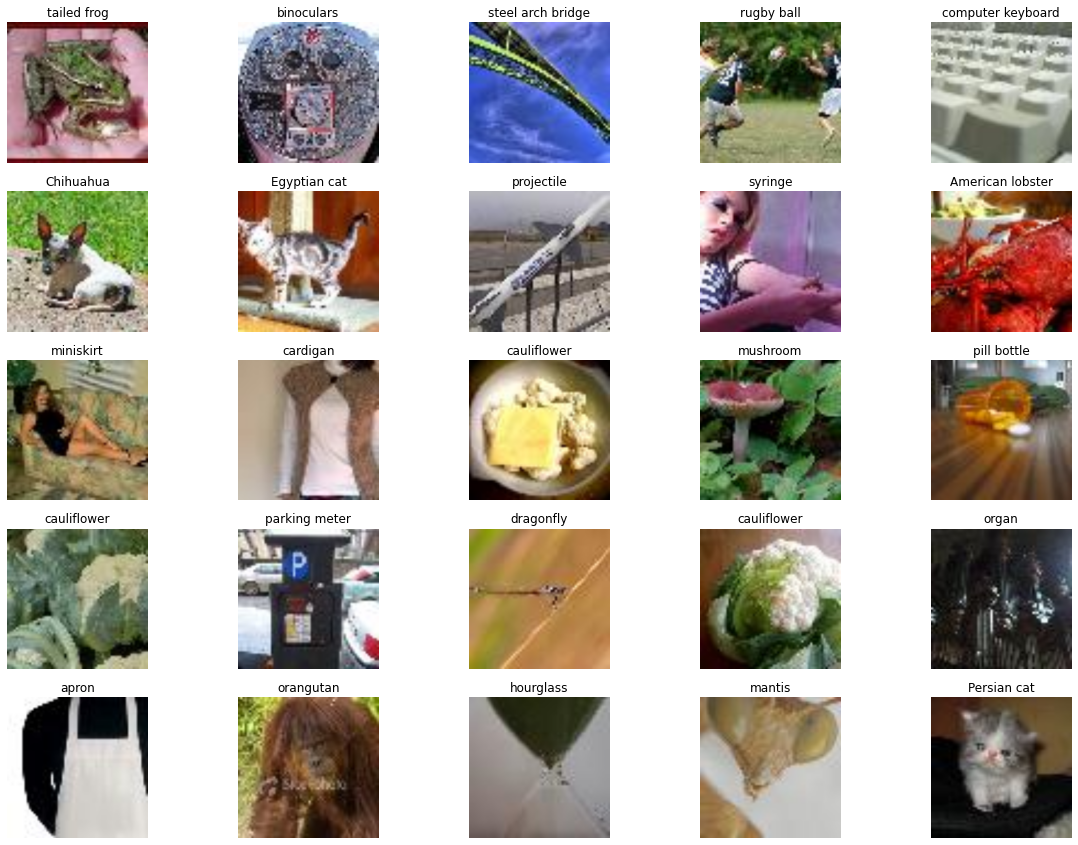

In [4]:
cols = ['Column {}'.format(col) for col in range(1, 4)]
rows = ['{}'.format(row) for row in y]
labels = open(LABEL,'r').read().split("\n")[:-1]
word_labels = [i.split('\t') for i in open(WORD_LABELS,'r').read().split("\n")[:-1]]
word_labels = {i[0]:i[1] for i in word_labels}
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
for ax, row in zip(axes, rows):
    for ay in ax:
        rand_img = random.randint(0, len(X))
        ay.imshow( cv2.cvtColor(X[rand_img], cv2.COLOR_RGB2BGR))
        ay.axis('off')
        image_label = word_labels[labels[ y[rand_img] ]]
        ay.set_title(image_label.split(',')[0] )
        

In [5]:
# Let's see how balance the data were 
unique, counts = np.unique(y, return_counts=True)
print("Shape of the image", X[0].shape)
print("Size of the dataset", len(y))
print("Total number of labels", len(word_labels))
print("=================================")
print( "standard deviation : ", np.std(counts) )
print( "Mean : ", np.mean(counts) )
print( "Mean : ", np.var(counts) )

Shape of the image (224, 224, 3)
Size of the dataset 100000
Total number of labels 82114
standard deviation :  0.0
Mean :  500.0
Mean :  0.0


Now we know that the dataset is balance. We don't need to generate more data to make it balance

# 4. Building Model

## ImageNet

In [64]:



LEARNING_RATE = 0.001
EPOCHS = 25

def depth_block(x, strides):
    x = tf.keras.layers.DepthwiseConv2D(3,strides=strides,padding='same',  use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    return x
def single_conv_block(x,filters):
    x = tf.keras.layers.Conv2D(filters, 1,use_bias=False)(x)
    x= tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    return x
def combo_layer(x,filters, strides):
    x = depth_block(x,strides)
    x = single_conv_block(x, filters)
    return x
def MobileNet(input_shape=(224,224,3),n_classes = 1000):
    input = tf.keras.layers.Input ( input_shape)
    x = tf.keras.layers.Conv2D(32,3,strides=(2,2),padding = 'same', use_bias=False) (input)
    x =  tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = combo_layer(x,64, strides=(1,1))
    x = combo_layer(x,128,strides=(2,2))
    x = combo_layer(x,128,strides=(1,1))
    x = combo_layer(x,256,strides=(2,2))
    x = combo_layer(x,256,strides=(1,1))
    x = combo_layer(x,512,strides=(2,2))
    for _ in range(5):
        x = combo_layer(x,512,strides=(1,1))
    x = combo_layer(x,1024,strides=(2,2))
    x = combo_layer(x,1024,strides=(1,1))
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output = tf.keras.layers.Dense(n_classes,activation='softmax')(x)
    model = tf.keras.Model(input, output)
    return model

n_classes = len(word_labels)
input_shape = IMAGE_SHAPE
model = MobileNet(input_shape,n_classes)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy']
)
# model.summary()
mobile_net_history = model.fit(X,y,epochs=EPOCHS)

Epoch 1/500
  85/3125 [..............................] - ETA: 2:07:56 - loss: 6.4574 - accuracy: 0.0066

KeyboardInterrupt: 

## VGG-16

## High Resolution CNN

# CoAtNet-7

# ViT-G/14 